# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import math

df = pd.read_csv('data/human_body_temperature.csv')

## Is the distribution of body temperatures normal?

In [3]:
df.shape

(130, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [7]:
df.temperature.unique()

array([ 99.3,  98.4,  97.8,  99.2,  98. ,  98.8,  98.6,  96.7,  98.2,
        98.7,  98.3,  97.2,  99.4,  98.1,  97.6,  98.5,  99.5,  99.1,
        97.9,  96.4,  96.9,  99. ,  97.4,  97.1,  98.9,  97.7,  97.5,
       100. ,  96.8,  99.9,  97. ,  97.3, 100.8,  96.3])

In [8]:
df.groupby(['temperature']).count()

,gender,heart_rate
temperature,,
96.3,1,1
96.4,1,1
96.7,2,2
96.8,1,1
96.9,1,1
97.0,1,1
97.1,3,3
97.2,3,3
97.3,1,1


### Histogram to visually check the distribution follows a Normal curve.

Since temperature data are continuous, a look at the Probability Density Function provides a view of the distribution:

C:\Users\jisha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


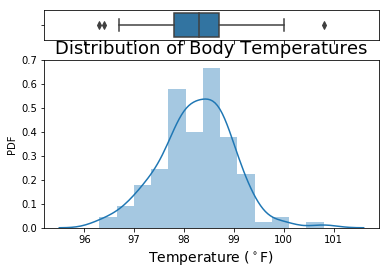

In [9]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

 Outliers are present,but the distribution of body temperatures appears normal. For the sake of ruling out binning bias and comparison to a theoretical normal distribution (and practice), a look at the Cumulative Distribution Function is next:

In [10]:
# Define a function to compute the CDF:

def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

In [11]:
# Compute and save variables for summarizing the empirical distribution -

# Sample Size:
n = len(df.temperature)

# Sample Mean:
M = np.mean(df.temperature)

# Sample Standard Deviation:
s = np.std(df.temperature)

print('n =', n, '\nM =', M, '\ns =', s)

n = 130 
M = 98.24923076923078 
s = 0.7303577789050377


In [12]:
# Seed the random number generator:
np.random.seed(15)


# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal

array([98.02111923, 98.49702999, 98.13536176, ..., 98.79844721,
       97.6501198 , 98.22401087])

## Is the sample size large? Are the observations independent?

In [13]:
len(df)

130

Sample size > 30 and sufficiently large for CLT. Samples are independent because they are taken from different people.

In [14]:
df[df.temperature.isnull()]

,temperature,gender,heart_rate


As you can see from the above results, there are 130 observations in the given dataset. It is generally accepted that if a sample has more than 30 observations, the sample is large. So in this case, the sample size is large.

Each random variable in this sample and population measures the temperature of a human and are independent observations.

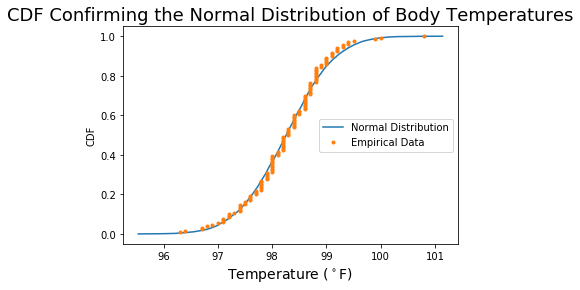

In [15]:
# Compute CDFs:
x_temp, y_temp = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
fig = plt.title('CDF Confirming the Normal Distribution of Body Temperatures', fontsize=18)


# Save and display the plots:
#plt.savefig('reports/figures/cdf_body_temps.png')
plt.show()

## Is the True Population Mean Really 98.6°F?
### Is it best to use a one-sample or two-sample test? Why?
### In this situation, is it appropriate to use the $t$ or $z$ statistic?
### Try using the other test. How is the result different? Why?


It is best to use a one-sample test since one set of data is compared to a single value. For this situation, it is best to use a t-statistic since the population standard deviation is unknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much.


Null Hypothesis: The true population mean is equal to the conventional mean (98.6$^\circ$F).

$$H_0: \mu - 98.6 = 0$$

Significance Level: 99.9% Confidence

$$\alpha = 0.01$$

In [16]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


In [17]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1)))

-3.3675464541818454 3.367546454181878


The t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level and the p-value is certainly below the significance level of 0.01, so the null hypothesis can be rejected.

Let's look at a few more tests. The z-test is not the most appropriate since the population standard deviation is not known; however, it can be approximated using the standard error of the mean:

In [18]:
# Calculate standard error of the mean:
sem = s/np.sqrt(n)
sem

0.06405661469519336

In [20]:
# Calculate and save z-statistic:
z = (M - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08


As expected, the z-statistic is very close to the t-statistic and the p-value is also very low.

Another test method is to generate many sets of simulated data assuming the null hypothesis is true, then compute the test statistic for each simulated dataset:

In [21]:
# Define bootstrap functions:

def replicate(data, function):
    """Return replicate of a resampled data array."""
    
    # Create the resampled array and return the statistic of interest:
    return function(np.random.choice(data, size=len(data)))


def draw_replicates(data, function, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates:
    replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        replicates[i] = replicate(data, function)

    return replicates

In [22]:
# Seed the random number generator:
np.random.seed(15)


# Make an array of translated temperatures:
translated_temps = df.temperature - M + 98.6

# Draw bootstrap replicates of translated temperatures:
translated_replicates = draw_replicates(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature mean:
p = np.sum(translated_replicates <= M) / len(translated_replicates)

# Print the p-value:
print('p-value =', p)

p-value = 0.0


In every test the p-value is significantly less than 0.01, so the null hypothesis is rejected. There is sufficient evidence to warrant rejection of the claim that the true population mean is the conventional normal human body temperature of 98.6°F.

## Draw a Sample of Size 10 from the Data and Repeat Both Tests
### Which one is the correct one to use?
### What is noticeable? What does this say about the difference in application of the $t$ and $z$ statistic?


This test meets the criteria for a t-test: the population standard deviation is unkown and the sample size is small.

In [23]:
# Seed the random number generator:
np.random.seed(15)


# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(df.temperature, size=10)
sample

array([98.4, 97.9, 97.1, 98.7, 98.2, 98.4, 98.2, 98.8, 96.7, 96.4])

In [24]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.6882644585784705
p-value: 0.024867110651187487


In [25]:
# Calculate and save z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -2.833679547329114
p-value: 0.004601545004804199


In [26]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

-2.262157162740992 2.2621571627409915


In [27]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (99.9%) and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-4.780912585933472 4.7809125859335495


The test statistic falls outside the t-distribution corresponding to a 95% confidence level, but not 99.9%. The p-value for the z-test is below both significance levels, but the p-value for the t-test indicates significance only at the 95% level. Both tests provide evidence to reject the null hypothesis. The difference in results reflects the nature of the two distributions. The t-distribution is wider so there is more variability. This makes the t-test less sensitive.

## At what value is one's temperature considered 'abnormal'?
Start by computing the margin of error and confidence interval.

In [33]:
# Save the critical value at 99.95% confidence:
z_critical = norm.ppf(0.9995)
z_critical

3.2905267314919255

In [34]:
print('Standard Error of the Mean:', sem)

# Calculate and save the margin of error:
moe = z_critical * sem
print('Margin of Error:', moe)

Standard Error of the Mean: 0.06405661469519336
Margin of Error: 0.21078000298341226


In [35]:
# Calculate and save the 99.9% confidence interval:
CI = np.array([M - moe, M + moe])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [98.03845077 98.46001077]


Another method to check the confidence interval:

In [36]:
# Seed the random number generator:
np.random.seed(15)


# Draw bootstrap replicates of temperatures:
replicates = draw_replicates(df.temperature, np.mean, 10000)

# Compute the 99.9% confidence interval:
CI = np.percentile(replicates, [0.05, 99.95])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [98.04384577 98.45923154]


In [37]:
# Calculate and save the 95% prediction interval:
PI = stats.norm.interval(0.95, loc=M, scale=s)
print('95% Prediction Interval:', PI)

95% Prediction Interval: (96.81775582674824, 99.68070571171332)


This calculation says that we 95% of the population lies between 96.82 and 99.68. Temperatures outside this range would be considered "abnormal."

C:\Users\jisha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


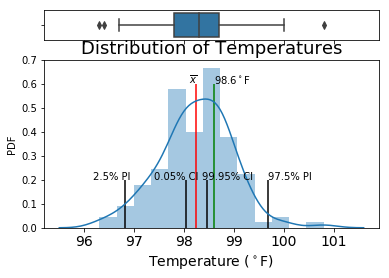

In [38]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Temperatures', fontsize=18)

# Add text and lines marking the 99.9% confidence interval:
plt.text(x=CI[0]-0.65, y=0.2, s='0.05% CI')
plt.vlines(ymin=0, ymax=0.2, x=CI[0])
plt.text(x=CI[1]-0.1, y=0.2, s='99.95% CI')
plt.vlines(ymin=0, ymax=0.2, x=CI[1])

# Add a lines for different means:
plt.text(x=M-0.15, y=0.6, s='$\overline{x}$')
plt.vlines(ymin=0, ymax=0.6, x=M, color='red')
plt.text(x=98.6, y=0.6, s='98.6$^\circ$F')
plt.vlines(ymin=0, ymax=0.6, x=98.6, color='green')

# Add text and lines marking the 95% prediction interval:
plt.text(x=PI[0]-0.65, y=0.2, s='2.5% PI')
plt.vlines(ymin=0, ymax=0.2, x=PI[0])
plt.text(x=PI[1], y=0.2, s='97.5% PI')
plt.vlines(ymin=0, ymax=0.2, x=PI[1])

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Save and display the plots:
#plt.savefig('reports/figures/pdf_temps.png')
plt.show()

Since a temperature at or below 95°F is considered hypothermia and a temperature at or above 100°F is a fever, temperatures outside the range of 96.8 to 99.7°F seem to fit the definition of abnormal.

## Is There a Significant Difference Between Males and Females in Normal Temperature?¶
     What test is used and why?

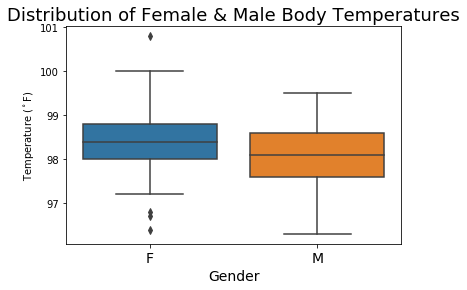

In [43]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
fig = plt.xlabel('Gender', fontsize=14)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

There does seem to be a difference between the two but note immediately that the means for both genders are within the IQR (interquartile range) of each other. This clues us to the fact that their respective means are not that far from each other. Of course, we can calculate some numbers to verify this suspicion.


In [44]:
##Male Temperatures
men=df[df.gender=='M']
men.shape

(65, 3)

In [45]:
men_mean_temp=men.temperature.mean()
men_mean_temp

98.1046153846154

In [52]:
##Female Temperatures
fem=df[df.gender=='F']
fem.shape

(65, 3)

In [47]:
fem_mean_temp=fem.temperature.mean()
fem_mean_temp

98.39384615384613

In [48]:
men_std_temp=men.temperature.std()
men_std_temp

0.6987557623265908

In [49]:
fem_std_temp=fem.temperature.std()
fem_std_temp

0.7434877527313665

In [50]:
## Diference in mean of Male and Female temperatures
mean_diff=fem_mean_temp - men_mean_temp
mean_diff

0.289230769230727

In [51]:
## Standard Error Calculation
SE=((men_std_temp**2)/65 + (fem_std_temp**2)/65)**0.5
SE

0.12655395041982642

In [57]:
## Degrees of Freedom Calculation
F1=fem_std_temp**2/65
M1=men_std_temp**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF

127.5103008303909

In [58]:
## Use 0.05 Significance level in two sample t-test
t_val=((fem_mean_temp-men_mean_temp)-0)/SE
t_val

2.285434538165274

In [59]:
p_value = stats.t.sf(np.abs(2.29), 128)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value

0.023657711289024146

In [61]:
if p_value<0.05:
    print('Null hypothesis- female and male temperature are the same will be rejected.')
    print('There is significance difference between male and female body temperatures.')
else: 
    print(' Mean of female and amle temperature are the same IS TRUE!')

Null hypothesis- female and male temperature are the same will be rejected.
There is significance difference between male and female body temperatures.


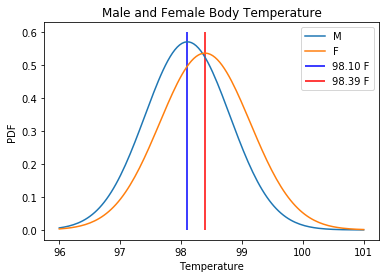

In [62]:
##Normal Distribution graph of Male and Female Temperatures
x = np.linspace(96,101,130)
y1 = stats.norm.pdf(x, loc=men_mean_temp, scale=men_std_temp)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=fem_mean_temp, scale=fem_std_temp)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(men_mean_temp,0, 0.6, color='blue')
pylab.vlines(fem_mean_temp,0,0.6, color='red')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()

The null hypothesis was rejected. There is a difference in human body temperatures between females and males.